<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/py_torch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch computer vision

## 0. Computer vision libraries in PyTorch

* `tochvision` - base domain for PyTorch computer vision
* `torchvision.datasets` - get datsets and dta loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you cna leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model (data augmentation)
* `torchvision.utils.data.DataSet` - Base Dataset class for PyTorch
* `torchvision.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
# import torch
import torch
from torch import nn

# import matplot for visualization
import matplotlib.pyplot as plt

# import torch vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


## 1. Getting a dataset

The dataset that we'll be uinsg is FashinoMNist



In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root = "data", # where to download data
    train = True, # do we want the training dataset
    download = True, # do we want to download the data
    transform = ToTensor(), # how do we want to transform the data
    target_transform = None # how do we ant transfrm the labels/targets?
    )

# Setup testing data
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26421880/26421880 [00:00<00:00, 116197994.37it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 91092628.82it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 59568802.23it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 26396426.64it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first trainig example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

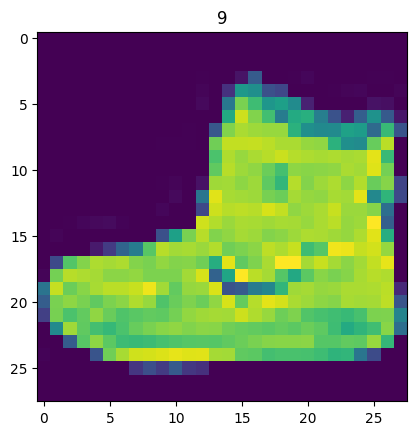

In [5]:
plt.imshow(image.squeeze())
plt.title(label).set_color("black");

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channle, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channle, height, width]
Image label: Ankle boot


### 1.1 Visualizing our data

Image shape: torch.Size([1, 28, 28])


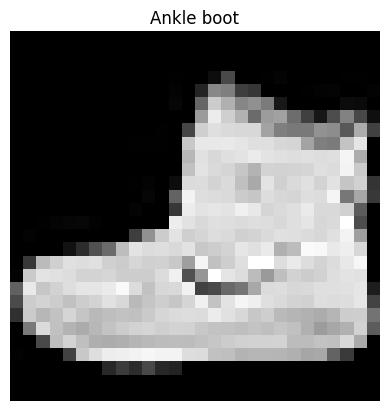

In [9]:
imge, label = train_data[0]
print(f"Image shape: {imge.shape}")
plt.imshow(imge.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

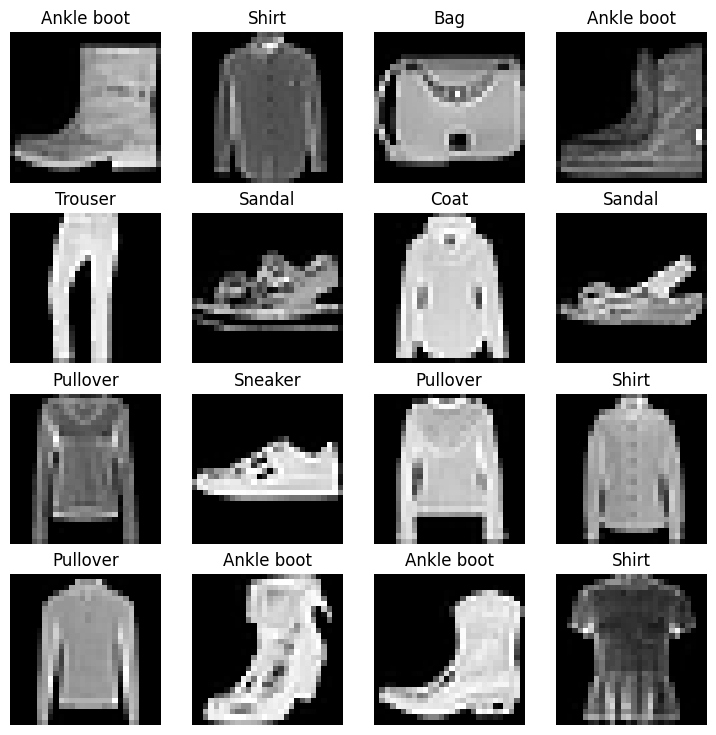

In [10]:
# Plot more images
torch.manual_seed(42)

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);


Do you think these items of clothing (images) could be moddeled with pure modelar lines? Or you think we'll need no n-linearity?

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dtaset into Python iterable

Mor specificaly, we want to tunr our dta into batches (or mini-batches)

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store imn memory) at 60000 images in one hit. So we break it doen to 32 images a time (batch size of 32).
2. It gives our neural netwaor more changes to update its gradients per epoch.


In [11]:

from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)


test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [12]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x79df1e477c10>, <torch.utils.data.dataloader.DataLoader object at 0x79df206dc7c0>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [13]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

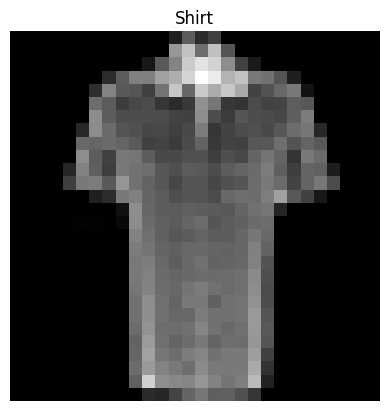

In [14]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

## 3. Model 0: Build a baseline model

When starting to build a series of machine learnig modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In [15]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward

# Print out what's happenning
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height * width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height * width]


In [16]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [17]:
model_0 = FashionMNISTModelV0(input_shape=784, hidden_units=10, output_shape=len(class_names)).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x = torch.rand([1, 1, 28, 28])
torch.round(model_0(dummy_x)).shape

torch.Size([1, 10])

### 3.1 Setup loss, optimizer functions

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.opt.SGD()` (stochastic gradient descnet)
* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric.

In [19]:
# Create a loss function
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [20]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of main things you'll often want to track are:

1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [21]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [22]:
start_time = timer()
# some code
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


5.6814000004123955e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches
3. Loop through testing batches, perform testing steps, calculate the test losss *per batch*.
4. Print what is happening.
5. Time it all (for fun)

In [23]:
from helper_functions import accuracy_fn

In [24]:
# import tqdm for progres bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number od epochs (we'll keep smmal for faster training time)
epochs = 3

# Create a trainig and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  ### Training

  train_loss = 0
  # Add a loop to loop through training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what's happenning
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/ {len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train
  train_loss /= len(train_dataloader)

  ## Testing
  test_loss, test_acc = 0, 0
  model_0.eval()

  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate the loss
      test_loss += loss_fn(test_pred, y_test) # accumulate

      # 3. Calculate the accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test accuracy average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happenning
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_0.parameters()).device))

total_train_time_model_0

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples

Train loss: 0.59484 | Test loss: 0.51635, Test acc: 81.84%

Epoch: 1
---------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples

Train loss: 0.47946 | Test loss: 0.48138, Test acc: 83.18%

Epoch: 2
---------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples

Train loss: 0.45703 | Test loss: 0.47773, Test acc: 83.50%

Train time on cpu: 29.846 seconds


29.84634366199998

## 4. Make predcitons and get Model 0 results




In [51]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
  """Returns a dictionary containing the results of a model predicting on data_loader."""
  loss, acc = 0, 0

  model.eval()

  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our dat device agnostic
      X, y = X.to(device), y.to(device)

      # Make predicitons
      model.to(device)

      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)

      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find teh average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

mdoel_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
mdoel_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4777320921421051,
 'model_acc': 83.49640575079871}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [26]:
!nvidia-smi

Wed Jul  3 00:46:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [27]:
torch.cuda.is_available()

True

In [28]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

We learned the pwer of non-linearity before in notebook 2

In [39]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [40]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics

In [42]:
# Create loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 6.2 Functionalizing trainging and evaluationtesting loops

Let's create a function for:

* training loop - `train_step()`
* testing loop - `test_step()`


In [43]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [44]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [45]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 31.656 seconds


In [52]:
model_1_results = eval_model(model=model_1, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [54]:
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4777320921421051,
 'model_acc': 83.49640575079871}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets.

CNN's are know for their capabilities to find patterns in visual data.

https://poloclub.github.io/cnn-explainer/


In [63]:
# Create a convolutional neural netwrok


class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG model from CNN explainer website
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int
              ):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d( # values we can set ourselves in our NN's called hyperparameters
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
          ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
          ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
      )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
          ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
          ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
      )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features=hidden_units*7*7, #
            out_features=output_shape
          )
      )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x



In [64]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
  ).to(device)

model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

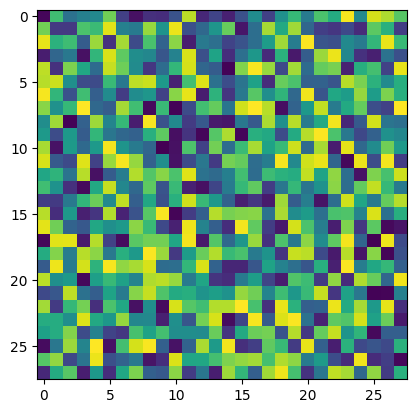

In [61]:
rand_image_tensor = torch.rand([1, 28, 28])

rand_image_tensor.shape

plt.imshow(rand_image_tensor[0].squeeze())

In [65]:
model_2(rand_image_tensor.unsqueeze(dim=0).to(device))

tensor([[ 0.0286, -0.0735,  0.0640, -0.0428, -0.0095,  0.0198,  0.0070, -0.0173,
          0.0176,  0.0046]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.3 Setup Loss/optimizer functions for `model_2`

In [66]:
# Setup loss funciton/eval metrics/optimizer for `model_2`

from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

### 7.4 training and testing `model_2` using our traing and test functions

In [67]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
train_time_start_on_gpu = timer()

# Train and test model
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )

    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_on_gpu = timer()

total_train_time_model_2 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59738 | Train accuracy: 78.33%
Test loss: 0.40593 | Test accuracy: 85.45%

Epoch: 1
---------
Train loss: 0.36087 | Train accuracy: 86.99%
Test loss: 0.34766 | Test accuracy: 86.92%

Epoch: 2
---------
Train loss: 0.32419 | Train accuracy: 88.22%
Test loss: 0.32062 | Test accuracy: 88.35%

Train time on cuda: 38.558 seconds


In [68]:
!nvidia-smi

Wed Jul  3 02:46:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              34W /  70W |    183MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [69]:
# Get model_2 results

model_2_results = eval_model(model=model_2, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3206203281879425,
 'model_acc': 88.34864217252397}

In [70]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4777320921421051,
 'model_acc': 83.49640575079871}

In [71]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [72]:
## 8. COmpare model results and trinig time

import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.477732,83.496406
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.320620,88.348642


In [73]:
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.477732,83.496406,29.846344
1,FashionMNISTModelV1,0.685001,75.019968,31.655775
2,FashionMNISTModelV2,0.320620,88.348642,38.558382


Text(0, 0.5, 'model')

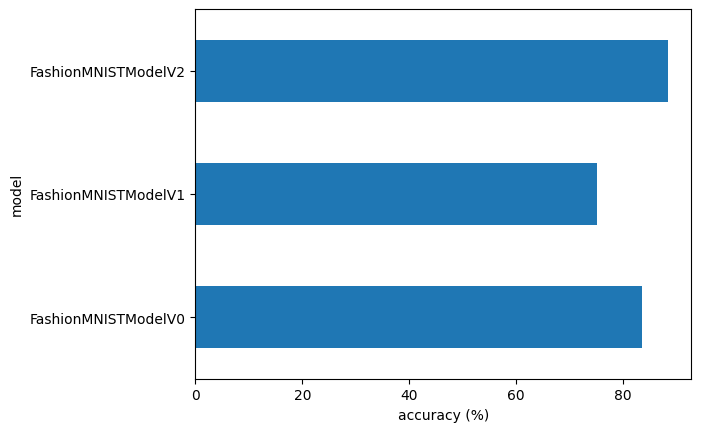

In [76]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

Text(0, 0.5, 'model')

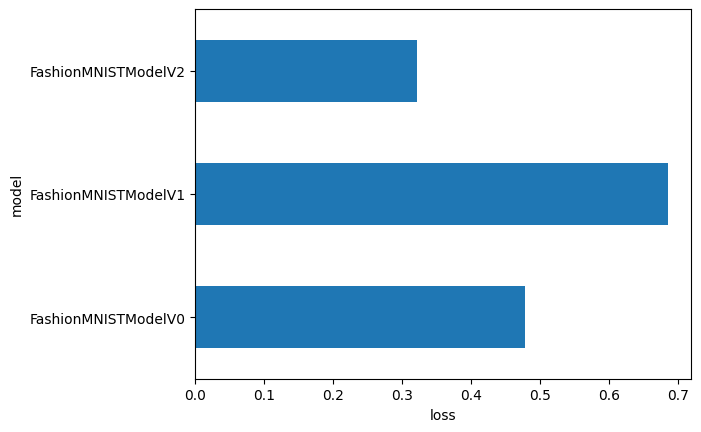

In [77]:
compare_results.set_index("model_name")["model_loss"].plot(kind="barh")
plt.xlabel("loss")
plt.ylabel("model")

## 9. Make and evaluate random predicitons with best model

In [78]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)
      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)
      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())
  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [81]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

In [84]:
pred_probs = make_predictions(model=model_2, data=test_samples)

pred_probs[:2], pred_probs.shape

(tensor([[9.1360e-08, 7.4761e-08, 2.1226e-08, 1.0336e-07, 1.9675e-08, 9.9986e-01,
          2.3699e-07, 2.9469e-06, 1.9594e-05, 1.1850e-04],
         [5.6255e-02, 6.8586e-01, 1.4283e-03, 8.2204e-02, 3.1213e-02, 4.5759e-05,
          1.4191e-01, 2.7326e-04, 2.9608e-04, 5.1715e-04]]),
 torch.Size([9, 10]))

In [85]:
# Convert prediciton probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [86]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

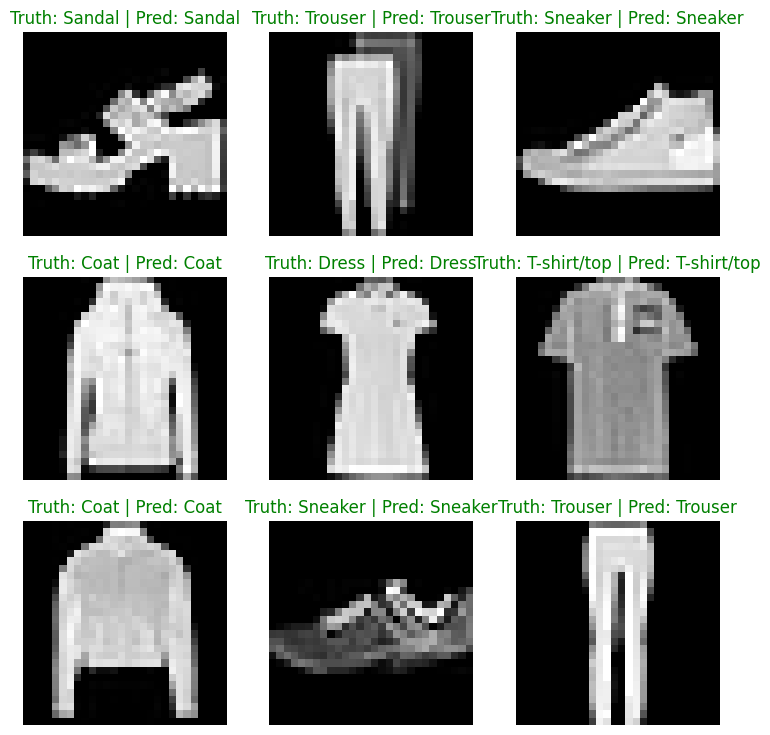

In [91]:
# Plot predicitons
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)
  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")
  if test_labels[i] == pred_classes[i]:
    plt.title(f'Truth: {class_names[test_labels[i]]} | Pred: {class_names[test_labels[i]]}', color="g")
  else:
    plt.title(f'Truth: {class_names[test_labels[i]]} | Pred: {class_names[test_labels[i]]}', color="r")

  plt.axis(False)


## 10. Making confusion matrix

In [92]:
import mlxtend

mlxtend.__version__

'0.22.0'

In [96]:
from tqdm.auto import tqdm
import numpy as np

# 1. Make predictions with trained model

y_preds = []
model_2.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Make descriptions..."):
    # Send data to GPU
    X, y = X.to(device), y.to(device)

    # Make predictions
    y_logit = model_2(X)

    # Get prediction probabilities
    y_pred = torch.softmax(y_logit.squeeze(), dim=1).argmax(dim=1)

    # Append to list of predictions
    y_preds.append(y_pred.cpu())


y_preds_tensor = torch.cat(y_preds)
y_preds_tensor


Make descriptions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

In [97]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
  print(f"mlxtend version: {mlxtend.__version__}")
  assert torchmetrics.__version__ >= "0.5.0", "torchmetrics version should be 0.5.0 or higher"
  print(f"torchmetrics version: {torchmetrics.__version__}")

except ModuleNotFoundError:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 45.0 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [102]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_preds_tensor,
                         target=test_data.targets)

In [103]:
confmat_tensor

tensor([[850,   2,  17,  27,   4,   1,  90,   0,   9,   0],
        [  2, 971,   0,  21,   3,   0,   1,   0,   2,   0],
        [ 10,   0, 771,  11, 132,   0,  75,   0,   1,   0],
        [ 18,   3,  12, 907,  27,   0,  32,   0,   1,   0],
        [  0,   0,  54,  33, 833,   0,  80,   0,   0,   0],
        [  0,   0,   0,   2,   0, 977,   0,  13,   2,   6],
        [145,   1,  71,  34,  76,   0, 657,   0,  16,   0],
        [  0,   0,   0,   0,   0,  23,   0, 941,   0,  36],
        [  3,   1,   4,   6,   2,   1,  10,   5, 968,   0],
        [  0,   0,   0,   0,   0,   8,   1,  32,   1, 958]])

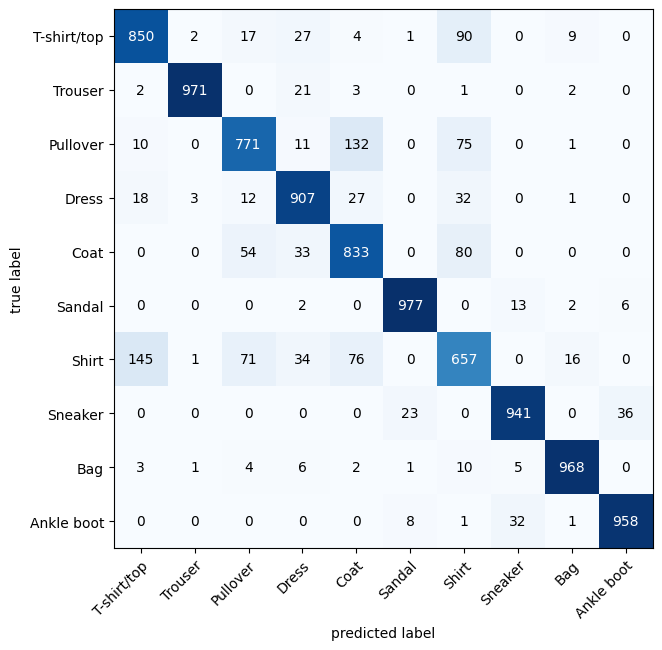

In [104]:
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 11. Save and load best performnace model

In [105]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "02_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

In [106]:
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
    ).to(device)

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [107]:
torch.manual_seed(42)
loaded_model_2_results = eval_model(model=loaded_model_2, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3206203281879425,
 'model_acc': 88.34864217252397}

In [111]:
torch.isclose(torch.tensor(model_2_results['model_loss']), torch.tensor(loaded_model_2_results['model_loss']), atol=1e-2)

tensor(True)